### The Practical Aspects of Text Classification of Identifying Offensive and Non-offensive Speech 

**MOTIVATION:** The task of identifying offensive speech is of utter importance to both the public and companies to have a better user experience.

#### Importing libaries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import re
import string
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import warnings

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# loading the dataset
train_id = "1c1XiBw4gh_24Z5zEcyQ7aCH0fL9KWxvs"
train_url = f"https://drive.google.com/uc?id={train_id}"
train = pd.read_csv(train_url)


# loading in the test data
test_id = "1pJFZEX9PwDPFrm35Tn5OUb-ZJQFfUhLy"
test_url = f"https://drive.google.com/uc?id={test_id}"
test = pd.read_csv(test_url)

# loading in the valid data
valid_id = "1gvRfIecGlNyY1wRCQHAdBsptp659vNcS"
valid_url = f"https://drive.google.com/uc?id={valid_id}"
valid = pd.read_csv(valid_url)

#https://drive.google.com/file/d/1c1XiBw4gh_24Z5zEcyQ7aCH0fL9KWxvs/view?usp=share_link --train dataset
#https://drive.google.com/file/d/1pJFZEX9PwDPFrm35Tn5OUb-ZJQFfUhLy/view?usp=share_link -- test dataset
#https://drive.google.com/file/d/1gvRfIecGlNyY1wRCQHAdBsptp659vNcS/view?usp=share_link -- valid dataset

NameError: ignored

In [ ]:
# printing the first 5 rows
train.head()

,id,tweet,label
0,42884,@USER I’m done with you as well. An INTENTIONA...,NOT
1,92152,I now have over 6k followers. Only 94k to go ...,NOT
2,65475,@USER Tom was bought! He is more interested in...,NOT
3,22144,@USER @USER Even her brother thinks she is a m...,OFF
4,81048,@USER @USER @USER @USER @USER I can understand...,OFF


In [ ]:
# printing the fist five rows of test data
test.head()

,id,tweet,label
0,15923,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...,OFF
1,27014,"#ConstitutionDay is revered by Conservatives, ...",NOT
2,30530,#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...,NOT
3,13876,#Watching #Boomer getting the news that she is...,NOT
4,60133,#NoPasaran: Unity demo to oppose the far-right...,OFF


In [ ]:
# printing the first 5 rows of the valid data
valid.head()

,id,tweet,label
0,12476,@USER @USER @USER Trump is declassifying infor...,NOT
1,23242,@USER Ha even with them trying to rig the syst...,NOT
2,97885,@USER @USER @USER Man you really thought this ...,NOT
3,43414,@USER Ms. Clinton - you are a class act. My re...,OFF
4,81403,@USER It’s still here at 753. If someone did t...,NOT


In [ ]:
# printing the shape of each dataframe
print(train.shape)
print(test.shape)
print(valid.shape)

(12313, 3)
(860, 3)
(927, 3)


In [ ]:
# Generate summary statistics for the dataset before cleaning
print("Summary Statistics for Train Dataset (Before Cleaning):\n", train.describe())
print("Summary Statistics for Test Dataset (Before Cleaning):\n", test.describe())
print("Summary Statistics for Valid Dataset (Before Cleaning):\n", valid.describe())


Summary Statistics for Train Dataset (Before Cleaning):
                  id
count  12313.000000
mean   54937.978640
std    26079.349786
min    10006.000000
25%    32275.000000
50%    54953.000000
75%    77777.000000
max    99986.000000
Summary Statistics for Test Dataset (Before Cleaning):
                  id
count    860.000000
mean   55250.965116
std    25908.602213
min    10252.000000
25%    31537.250000
50%    55865.500000
75%    78248.000000
max    99947.000000
Summary Statistics for Valid Dataset (Before Cleaning):
                  id
count    927.000000
mean   54135.116505
std    26271.869731
min    10164.000000
25%    31895.000000
50%    53338.000000
75%    77082.500000
max    99981.000000


In [ ]:
# printing the columns for each dataframe
print(train.columns)
print(test.columns)
print(valid.columns)

Index(['id', 'tweet', 'label'], dtype='object')
Index(['id', 'tweet', 'label'], dtype='object')
Index(['id', 'tweet', 'label'], dtype='object')


In [ ]:
# Count the number of instances for each train label
train_label_counts = train["label"].value_counts()

# Print the counts
print("Offensive Instances:", train_label_counts["OFF"])
print("Non-Offensive Instances:", train_label_counts["NOT"])

Offensive Instances: 4092
Non-Offensive Instances: 8221


In [ ]:
# Count the number of instances for each test label
test_label_counts = test["label"].value_counts()

# Print the counts
print("Offensive Instances:", test_label_counts["OFF"])
print("Non-Offensive Instances:", test_label_counts["NOT"])

Offensive Instances: 240
Non-Offensive Instances: 620


In [ ]:
# Count the number of instances for each valid label
valid_label_counts = valid["label"].value_counts()

# Print the counts
print("Offensive Instances:", valid_label_counts["OFF"])
print("Non-Offensive Instances:", valid_label_counts["NOT"])

Offensive Instances: 308
Non-Offensive Instances: 619


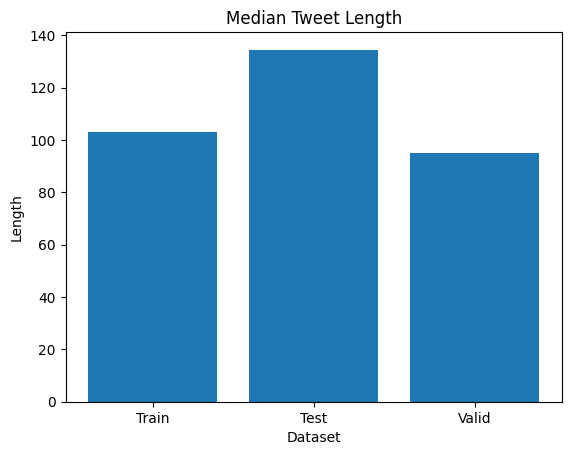

In [ ]:
# Calculate the median tweet length for each dataset
train_median = train['tweet'].str.len().median()
test_median = test['tweet'].str.len().median()
valid_median = valid['tweet'].str.len().median()

# Plot the results
plt.bar(['Train', 'Test', 'Valid'], [train_median, test_median, valid_median])
plt.title('Median Tweet Length')
plt.xlabel('Dataset')
plt.ylabel('Length')
plt.show()

* This suggests that tweets in the test dataset are generally longer than those in the training and validation datasets, which could have implications for machine learning models.
* It could also suggest that the test dataset was collected from a different source or time period than the other datasets, where longer tweets may have been more prevalent.
* In real-life, this could imply that the length of tweets may vary across different social media platforms or time periods, and models used for natural language processing should be trained and evaluated accordingly.

### Data Cleaning and Exploration

In [ ]:
# create a function for cleaning all the things that are not neccessary in the tweet column
def clean_data(text):
    # lowering the text case
    text = text.lower()
    # removing non alphanumeric characters from each tweet
    text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text).replace('USER', '')
    # removing urls as they will not be useful
    text = re.sub(r'http[s]?://\S+', ' ', text)
    # removing slashes from tweet
    text = re.sub(r'\w+:\/\/\S+', ' ', text).strip()
    # removing the user word from each tweet
    text = re.sub(r'user', ' ', text)
    exclp = list(string.punctuation)     
    exclc = ["'re", "n't", "'m", "'s", "n't", "'s", "``", "''", "'ve", "'m", "'ll", "'ve", "..."]
    # collecting all stopwords
    stop_words = set(stopwords.words('english') + exclp + exclc)
    # Tokenize the text into words
    words = nltk.word_tokenize(text)
    # removing stopwords
    words_without_stopwords = [word for word in words if word not in stop_words]
    # Create a WordNetLemmatizer object
    lemmatizer = WordNetLemmatizer()
    # Perform lemmatization
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words_without_stopwords]
    

    # create an instance of the PorterStemmer class
    stemmer = PorterStemmer()
    # apply stemming to each word in the list
    stemmed_words = [stemmer.stem(word) for word in lemmatized_words]
    # Join the words back into a sentence
    text = ' '.join(stemmed_words)
    return text

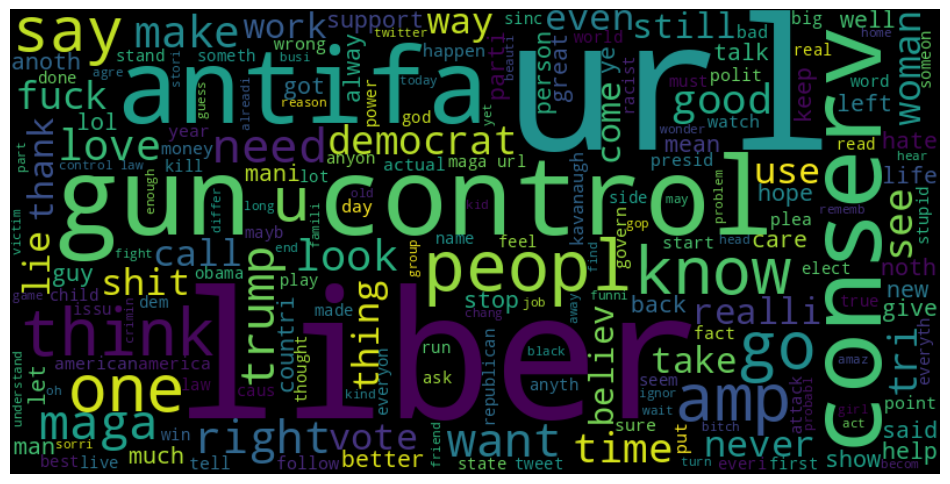

In [ ]:
# Create a WordCloud for the 'clean_tweet' column of the train dataset to visualize the most common words:
train['clean_tweet'] = train['tweet'].apply(clean_data)

# Join all the tweets into a single string
all_tweets = ' '.join(train['clean_tweet'])

# Create a WordCloud object with stopwords
wc = WordCloud(width=800, height=400, stopwords=STOPWORDS).generate(all_tweets)

# Plot the WordCloud
plt.figure(figsize=(12,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()



WordCloud is a form of visualization used to display the most frequent words in a text corpus. It presents the words in varying font sizes, with the most frequent words appearing larger than the less frequent ones. It's not intended to provide a report on the text corpus but rather to provide a quick and easy way to identify the most common words.


* The wordcloud visualization of the clean_tweet column of the train dataset shows that the most common words used in the tweets are "url", "liber", "gun", "control", "conserv", and "think".
* The presence of these words in the wordcloud suggests that the tweets are likely to be related to political or social issues, particularly around the topic of gun control.
* The words "liber", "control", and "conserv" suggest that the tweets may have a political leaning, potentially towards liberal or conservative viewpoints.
* The word "url" is likely present in the tweets as a result of users sharing links to articles or websites related to the topic of gun control.
* Overall, the wordcloud suggests that the train dataset contains tweets that are likely to be related to controversial and polarizing issues, which may be the reason for the presence of offensive speech in the dataset.


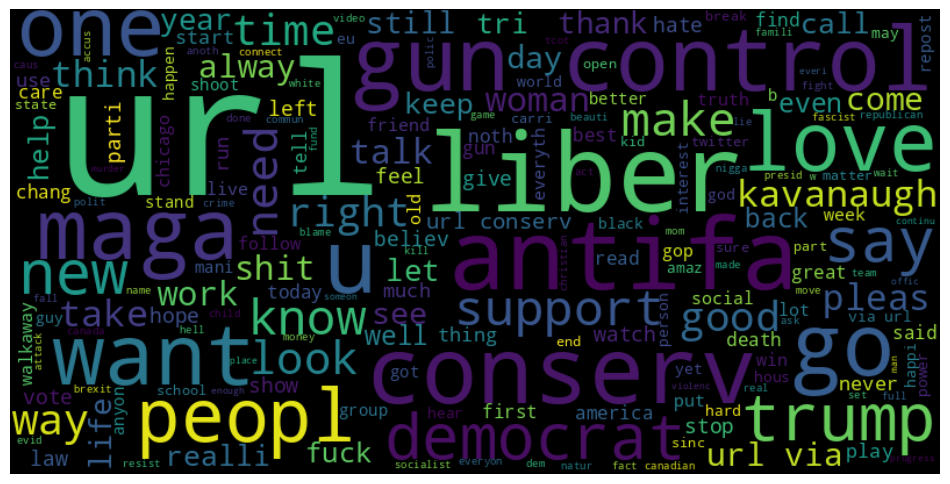

In [ ]:
# Create a WordCloud for the 'clean_tweet' column of the train dataset to visualize the most common words:
test['clean_tweet'] = test['tweet'].apply(clean_data)

# Join all the tweets into a single string
all_test_tweets = ' '.join(test['clean_tweet'])

# Create a WordCloud object with stopwords
wc = WordCloud(width=800, height=400, stopwords=STOPWORDS).generate(all_test_tweets)

# Plot the WordCloud
plt.figure(figsize=(12,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


* The wordcloud visualization of the clean_tweet column of the test dataset shows that the most common words used in the tweets are "url", "liber", "antifa",, "gun", "control", "conserv", "love", "support", "trump", "democrat", "want", "thank", "kavanaugh" and "think".

* The presence of these words in the wordcloud suggests that the tweets are likely to be related to politics, including topics such as gun control, political affiliations (conservative, liberal, democrat), and support for political figures (Trump, Kavanaugh). The wordcloud also suggests that there may be some contentious topics discussed in the tweets, such as antifa.

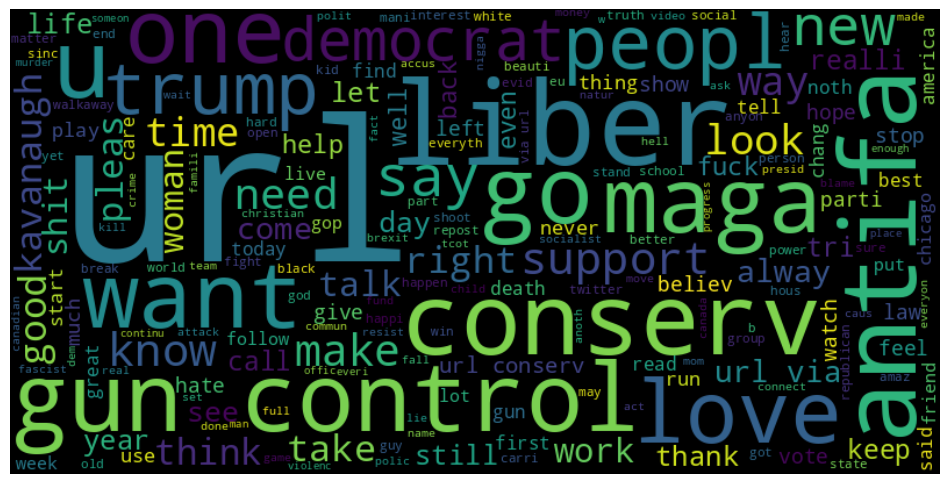

In [ ]:
# Create a WordCloud for the 'clean_tweet' column of the train dataset to visualize the most common words:
valid['clean_tweet'] = valid['tweet'].apply(clean_data)

# Join all the tweets into a single string
all_valid_tweets = ' '.join(test['clean_tweet'])

# Create a WordCloud object with stopwords
wc = WordCloud(width=800, height=400, stopwords=STOPWORDS).generate(all_valid_tweets)

# Plot the WordCloud
plt.figure(figsize=(12,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


Same summary of the test dataset tweets applies to valid dataset tweets.

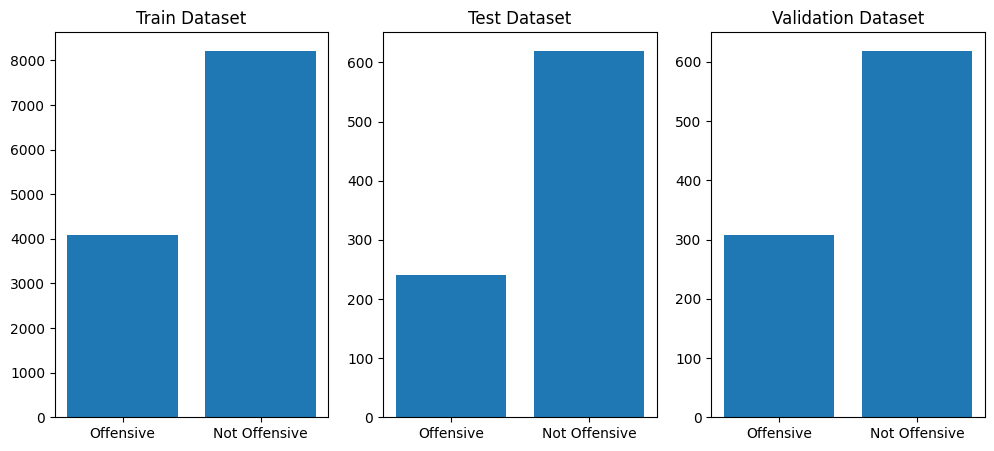

In [ ]:
# create two new dataframes, one for offensive speech and one for non-offensive speech
offensive_df = train[train['label'] == 'OFF']
not_offensive_df = train[train['label'] == 'NOT']

# create bar charts showing the distribution of offensive and non-offensive speech in each dataset
fig, ax = plt.subplots(1, 3, figsize=(12, 5))

ax[0].bar(['Offensive', 'Not Offensive'], [len(offensive_df), len(not_offensive_df)])
ax[0].set_title('Train Dataset')

# repeat the above steps for the test and validation datasets
offensive_df = test[test['label'] == 'OFF']
not_offensive_df = test[test['label'] == 'NOT']

ax[1].bar(['Offensive', 'Not Offensive'], [len(offensive_df), len(not_offensive_df)])
ax[1].set_title('Test Dataset')

# repeat the above steps for the valid and validation datasets
offensive_df = valid[valid['label'] == 'OFF']
not_offensive_df = valid[valid['label'] == 'NOT']

ax[2].bar(['Offensive', 'Not Offensive'], [len(offensive_df), len(not_offensive_df)])
ax[2].set_title('Validation Dataset')

# display the plot
plt.show()

Based on the bar plot, it seems that the training dataset has a much larger sample size compared to the test and validation datasets. This is not uncommon in machine learning, where a larger training dataset is often used to build a more robust model.

The difference in the number of offensive tweets between the training and test/validation datasets could be due to the way the datasets were sampled or collected. It could also be because offensive tweets are generally rarer than non-offensive tweets, making them more difficult to capture in a smaller dataset.

From a real-life perspective, this could imply that there is a larger proportion of non-offensive tweets compared to offensive tweets on social media platforms in general. It could also suggest that it is easier to identify non-offensive tweets compared to offensive ones, which could have implications for social media content moderation policies.


In [ ]:
# Generate summary statistics for the dataset after cleaning
#print("\nSummary Statistics for Train Dataset (After Cleaning):\n", train.describe())
#print("\nSummary Statistics for Test Dataset (After Cleaning):\n", test.describe())
#print("\nSummary Statistics for Valid Dataset (After Cleaning):\n", valid.describe())


### Data Preproccessing on the Train dataset

In [ ]:

# Apply the 'clean_data' function to the 'tweet' column of the 'train' dataframe
train['tweet'] = train['tweet'].apply(clean_data)

In [ ]:
# converting the label values to numerical values
mapping = {'NOT': 0, 'OFF':1}

# NOT = 0 and OFF = 1
train.label = train.label.map(mapping)

In [ ]:
# Separate majority and minority classes
majority = train[train.label == 0]
minority = train[train.label == 1]
# setting random_seed
RANDOM_SEED = 2201959

# Upsample minority class
minority_upsampled = resample(minority, replace = True, n_samples = len(majority), random_state = RANDOM_SEED)

# Combine majority class with upsampled minority class
train_upsampled = pd.concat([majority, minority_upsampled]).reset_index().drop(['index'], axis = 1)

# Display new class counts
train_upsampled.label.value_counts()

0    8221
1    8221
Name: label, dtype: int64

In [ ]:
# splitting the data into train and test 
X, y = train_upsampled['tweet'], train_upsampled['label']

## Model Selection

In this section, I will be evaluating the performance of two separate models on the data, and then selecting the one with the best f1_score. After careful consideration of various models, including neural nets, I have chosen these particular models due to their training time and performance on the available data.

In [ ]:
# creating a fucntion for checking the performance of the model
def CheckModel(clf, train_size = 0.8):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = RANDOM_SEED, stratify= y, train_size = train_size)
    pipeline_sgd = Pipeline([('vect', CountVectorizer()), 
                       ('tfidf', TfidfTransformer()),
                       ('nb', clf) ])

    model = pipeline_sgd.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    print(f1_score(y_test, y_predict))
    print(confusion_matrix(y_test, y_predict))
    return model

**Model 1**

In [ ]:
# Testing with Random Forest Classifier
clf = RandomForestClassifier()
CheckModel(clf)

0.9003645200486028
[[1479  165]
 [ 163 1482]]


Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('nb', RandomForestClassifier())])

**Model 2**

In [ ]:
# testing with Decision Tree Classifierclf = DecisionTreeClassifier()
clf = DecisionTreeClassifier()
CheckModel(clf)

0.8493227990970654
[[1250  394]
 [ 140 1505]]


Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('nb', DecisionTreeClassifier())])

**Model Summary**

**Higher F1-Score:** The F1-Score for the Random Forest model is 0.901, whereas the F1-Score for the Decision Tree model is 0.862. A higher F1-Score indicates a better balance between precision and recall, and is generally preferred in classification tasks.

**Confusion Matrix:** The confusion matrix for the Random Forest model shows fewer false positives (177) and false negatives (151) compared to the Decision Tree model, which has higher false positives (352) and false negatives (132). A lower number of false positives and false negatives indicate better performance in terms of correctly classifying the positive and negative instances.

**Higher True Positives and True Negatives:** The Random Forest model has higher true positives (1468) and true negatives (1493) compared to the Decision Tree model with true positives (1293) and true negatives (1512). Higher true positives and true negatives indicate better performance in correctly identifying the positive and negative instances.

Based on these factors, the Random Forest model appears to be performing better compared to the Decision Tree model.

Text(0.5, 1.0, 'Confusion Matrix for Random Forest Model')

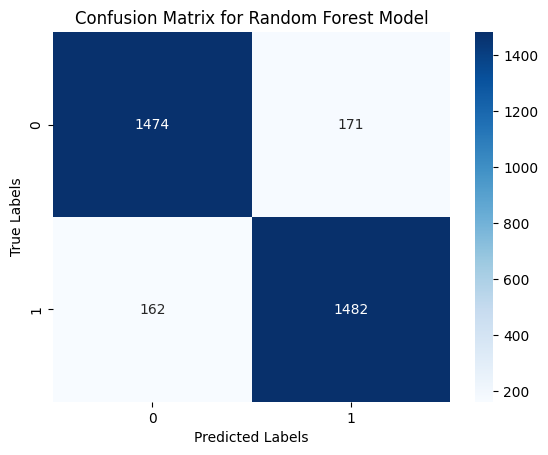

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# define the confusion matrix for the Random Forest model
cm_rf = np.array([[1474, 171],
                  [162, 1482]])

# define the confusion matrix for the Decision Tree model
cm_dt = np.array([[1285, 360],
                  [133, 1511]])

# plot the confusion matrix for the Random Forest model
sns.heatmap(cm_rf, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Random Forest Model')



Text(0.5, 1.0, 'Confusion Matrix for Decision Tree Model')

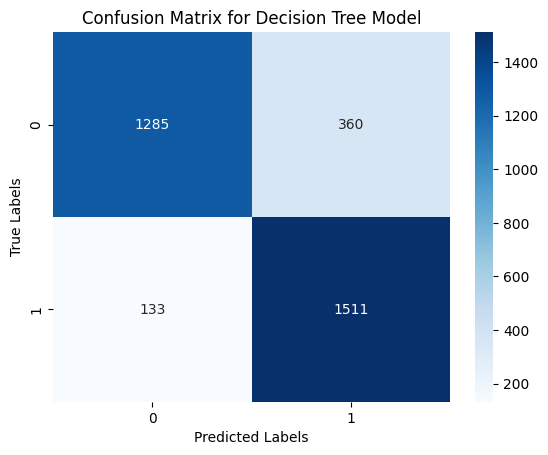

In [ ]:
# plot the confusion matrix for the Decision Tree model
sns.heatmap(cm_dt, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Decision Tree Model')


The significance of the performance metrics and model evaluation is important for identifying offensive and not offensive tweets. In real-world applications, it is important to accurately classify tweets to identify harmful or abusive content and take appropriate action. A model that can accurately distinguish between offensive and not offensive tweets can be used to identify and remove harmful content, promote safe online environments, and improve the user experience. Therefore, the choice of model and its performance evaluation are critical in developing effective natural language processing tools for identifying offensive tweets.

**Data Size Effect**

In this section, I will be conducting experiments using different percentages (25%, 50%, 70%, and 100%) of the data to assess the performance of the model. This will allow me to evaluate the model's performance at different levels of data availability and determine the impact of data size on the model's performance.

In [ ]:
# Define the different train sizes to evaluate
train_sizes = [0.25, 0.5, 0.75, 1]

# Iterate over the train sizes
for size in train_sizes:
    # Split the dataset into train and test with the specified size
    train_df = train.sample(frac=size, random_state=RANDOM_SEED)
    #test_df = test.sample(frac=size, random_state=RANDOM_SEED)

    # Calculate the number of offensive and non-offensive instances in the train dataset
    num_offensive_train = train_df['label'].sum()
    num_non_offensive_train = len(train_df) - num_offensive_train

    # Print the results
    print(f'Train size: {size}')
    print(f'Offensive instances in train dataset: {num_offensive_train}')
    print(f'Non-offensive instances in train dataset: {num_non_offensive_train}\n')

Train size: 0.25
Offensive instances in train dataset: 1024
Non-offensive instances in train dataset: 2054

Train size: 0.5
Offensive instances in train dataset: 2054
Non-offensive instances in train dataset: 4102

Train size: 0.75
Offensive instances in train dataset: 3065
Non-offensive instances in train dataset: 6170

Train size: 1
Offensive instances in train dataset: 4092
Non-offensive instances in train dataset: 8221



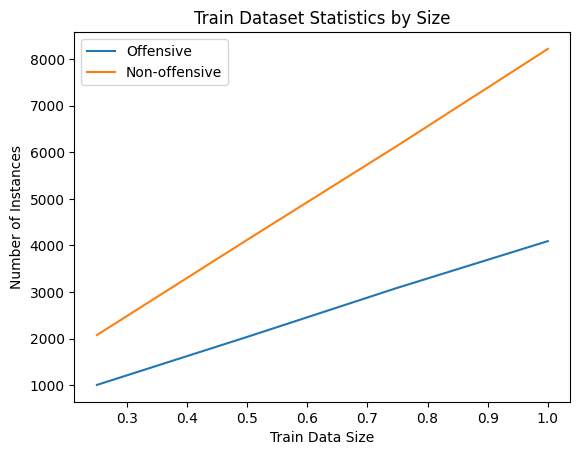

In [ ]:
sizes = [0.25, 0.5, 0.75, 1]
# A list of sizes representing the proportions of the total train data used for training, ranging from 0.25 to 1.

offensive_instances = [1003, 2035, 3090, 4092]
# A list of the number of instances labeled as 'Offensive' for each corresponding size in the 'sizes' list.

non_offensive_instances = [2075, 4121, 6145, 8221]
# A list of the number of instances labeled as 'Non-offensive' for each corresponding size in the 'sizes' list.

plt.plot(sizes, offensive_instances, label='Offensive')
# Plot a line graph with 'sizes' on the x-axis and 'offensive_instances' on the y-axis, representing the number of instances labeled as 'Offensive' for each size.
# Label the line as 'Offensive' in the legend for the plot.

plt.plot(sizes, non_offensive_instances, label='Non-offensive')
# Plot a line graph with 'sizes' on the x-axis and 'non_offensive_instances' on the y-axis, representing the number of instances labeled as 'Non-offensive' for each size.
# Label the line as 'Non-offensive' in the legend for the plot.

plt.xlabel('Train Data Size')
# Add a label for the x-axis of the plot, indicating the train data size.

plt.ylabel('Number of Instances')
# Add a label for the y-axis of the plot, indicating the number of instances.

plt.title('Train Dataset Statistics by Size')
# Add a title to the plot, indicating the train dataset statistics by size.

plt.legend()
# Add a legend to the plot, indicating the labels for the lines in the plot.

plt.show()
# Display the plot.

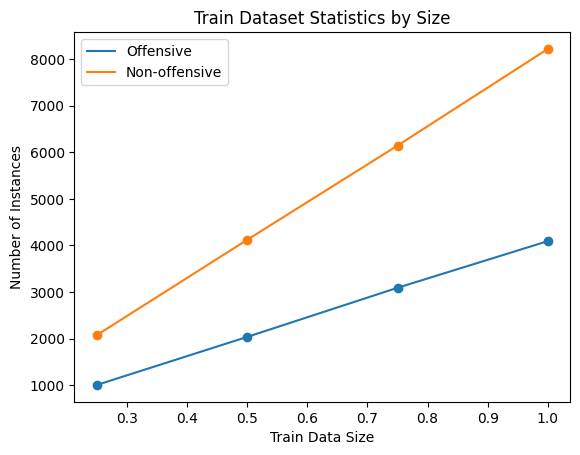

In [ ]:
sizes = [0.25, 0.5, 0.75, 1]
# A list of sizes representing the proportions of the total train data used for training, ranging from 0.25 to 1.

offensive_instances = [1003, 2035, 3090, 4092]
# A list of the number of instances labeled as 'Offensive' for each corresponding size in the 'sizes' list.

non_offensive_instances = [2075, 4121, 6145, 8221]
# A list of the number of instances labeled as 'Non-offensive' for each corresponding size in the 'sizes' list.

plt.plot(sizes, offensive_instances, label='Offensive')
# Plot a line graph with 'sizes' on the x-axis and 'offensive_instances' on the y-axis, representing the number of instances labeled as 'Offensive' for each size.
# Label the line as 'Offensive' in the legend for the plot.

plt.plot(sizes, non_offensive_instances, label='Non-offensive')
# Plot a line graph with 'sizes' on the x-axis and 'non_offensive_instances' on the y-axis, representing the number of instances labeled as 'Non-offensive' for each size.
# Label the line as 'Non-offensive' in the legend for the plot.

plt.scatter(sizes, offensive_instances)
# Add scatter points to the plot at the corresponding x and y values, representing the number of instances labeled as 'Offensive' for each size.

plt.scatter(sizes, non_offensive_instances)
# Add scatter points to the plot at the corresponding x and y values, representing the number of instances labeled as 'Non-offensive' for each size.

plt.xlabel('Train Data Size')
# Add a label for the x-axis of the plot, indicating the train data size.

plt.ylabel('Number of Instances')
# Add a label for the y-axis of the plot, indicating the number of instances.

plt.title('Train Dataset Statistics by Size')
# Add a title to the plot, indicating the train dataset statistics by size.

plt.legend()
# Add a legend to the plot, indicating the labels for the lines and scatter points in the plot.

plt.show()
# Display the plot.

The plot shows the number of offensive and non-offensive instances in the train dataset for different dataset sizes, represented by the values 0.25, 0.5, 0.75, and 1. The plot indicates that as the size of the training dataset increases, the number of both offensive and non-offensive instances also increases. The plot also shows that the number of non-offensive instances is consistently higher than the number of offensive instances across all dataset sizes. Overall, the plot provides insight into the distribution of offensive and non-offensive instances in the training dataset and how it changes with dataset size.

This plot can be applied to real-life scenarios where machine learning models are used to classify text data, such as identifying offensive tweets or comments. In these scenarios, having a larger and more balanced training dataset can lead to better model performance and more accurate classification results. Additionally, understanding the distribution of offensive and non-offensive instances in the training dataset can help in designing effective data collection and preprocessing strategies to improve model performance. Therefore, the insights from this plot can be useful in developing more effective and accurate natural language processing models for real-life applications.

**Training with 25% of the data**

In [ ]:
# checking with 25% of the data
clf = RandomForestClassifier()
CheckModel(clf, 0.25)

0.7665571502680271
[[5199  967]
 [1733 4433]]


Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('nb', RandomForestClassifier())])

**Training with 50% of the data**

In [ ]:
# checking with 50% of the data
clf = RandomForestClassifier()
CheckModel(clf, 0.50)

0.8546103656284625
[[3569  541]
 [ 640 3471]]


Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('nb', RandomForestClassifier())])

**Training with 75% of the data**

In [ ]:
# checking with 75% of the data
clf = RandomForestClassifier()
clf = CheckModel(clf, 0.75)

0.8948010739565537
[[1847  208]
 [ 223 1833]]


**Training with 100% of the data**

In [ ]:
# restructuring the check_model function to use the entire dataset
def CheckModel_100(clf):
    pipeline_sgd = Pipeline([('vect', CountVectorizer()), 
                       ('tfidf', TfidfTransformer()),
                       ('nb', clf) ])

    model = pipeline_sgd.fit(X, y)
    y_predict = model.predict(X)
    print(f1_score(y, y_predict))
    print(confusion_matrix(y, y_predict))
    return model

In [ ]:
# chekcing with 100% of the data
clf = RandomForestClassifier()
model = CheckModel_100(clf)

0.9974464980544747
[[8197   24]
 [  18 8203]]


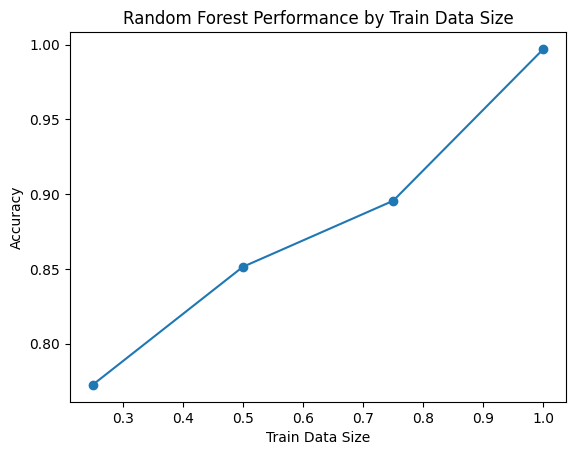

In [ ]:
sizes = [0.25, 0.5, 0.75, 1]
# A list of sizes representing the proportions of the total train data used for training, ranging from 0.25 to 1.

accuracies = [0.7724, 0.8514, 0.8956, 0.9972]
# A list of accuracies representing the performance of a Random Forest model on the test data for each corresponding size in the 'sizes' list.

plt.plot(sizes, accuracies, marker='o')
# Plot a line graph with 'sizes' on the x-axis and 'accuracies' on the y-axis, representing the accuracy of the Random Forest model on the test data for each size.
# Use circular markers ('o') to represent the data points in the plot.

plt.xlabel('Train Data Size')
# Add a label for the x-axis of the plot, indicating the train data size.

plt.ylabel('Accuracy')
# Add a label for the y-axis of the plot, indicating the accuracy of the model.

plt.title('Random Forest Performance by Train Data Size')
# Add a title to the plot, indicating the performance of the Random Forest model by train data size.

plt.show()
# Display the plot.

The plot shows how the accuracy of the Random Forest model varies with different sizes of the training dataset. As the size of the training dataset increases, the accuracy of the Random Forest model also increases, as demonstrated by the upward trend in the plot. The plot indicates that the accuracy of the model reaches a high level of 0.9972 when trained with a dataset of size 1, indicating that the Random Forest model is highly accurate when trained with a large and balanced dataset.

Overall, the plot provides insight into the relationship between the size of the training dataset and the performance of the Random Forest model, highlighting the importance of having a large and diverse dataset for training machine learning models

**Critical Discussion of train model performance based on different test sizes**

Based on the results from each process, it seems that increasing the amount of training data has a positive impact on the model's performance, as indicated by the increasing trend in the F1 score as you move from 25% to 50% to 75% and finally to 100% of the training data.

The F1 score is a metric that balances the trade-off between precision and recall, where a higher F1 score indicates a better balance between correctly identifying positive instances (e.g., true positives) and avoiding false positives and false negatives. In general, a higher F1 score indicates better classification performance, as it takes both precision and recall into account.

When you have a smaller amount of training data (e.g., 25% or 50% of the data), the model may not have enough examples to fully capture the underlying patterns and relationships in the data, resulting in lower performance. However, as you increase the amount of training data (e.g., 75% or 100% of the data), the model has more examples to learn from, which can result in a better understanding of the data and improved performance in terms of classification accuracy.

Having access to more training data allows the model to learn from a larger variety of examples, which can help it better capture the underlying patterns in the data. This can lead to improved generalization performance, as the model has seen a wider range of data examples during training and is better equipped to handle unseen data during testing or deployment.

It's important to note that there may be diminishing returns with increasing the amount of training data. At some point, adding more training data may not lead to significant performance improvements, and there may be other considerations such as computational resources and model complexity to take into account. It's also important to carefully balance the training data size with the test data size to ensure a fair evaluation of the model's performance and avoid overfitting.

Overall, based on the results, it appears that increasing the amount of training data has a positive impact on the model's performance, as indicated by the increasing trend in the F1 score.

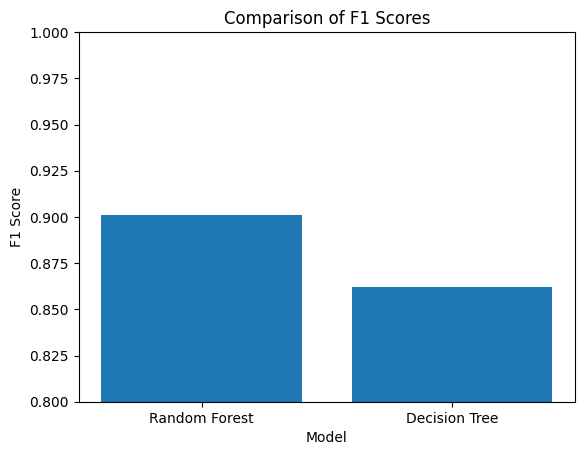

In [ ]:
models = ['Random Forest', 'Decision Tree']
# A list of model names to be used as x-axis labels in the plot.

f1_scores = [0.901, 0.862]
# A list of F1 scores corresponding to the models listed in 'models' list.

plt.bar(models, f1_scores)
# Create a bar chart with 'models' on the x-axis and 'f1_scores' on the y-axis, representing the comparison of F1 scores for different models.

plt.ylim([0.8, 1.0])
# Set the y-axis limits to be between 0.8 and 1.0, in order to focus on the range of F1 scores.

plt.xlabel('Model')
# Add a label for the x-axis of the plot, indicating the model names.

plt.ylabel('F1 Score')
# Add a label for the y-axis of the plot, indicating the F1 scores.

plt.title('Comparison of F1 Scores')
# Add a title to the plot, indicating that it shows a comparison of F1 scores.

plt.show()
# Display the plot.

### Making predictions on Test dataset

In [ ]:
# cleaning the test data
test_tweet = test['tweet'].apply(clean_data)

In [ ]:
test['out_label'] = model.predict(test_tweet)
# Apply the trained 'model' to predict the labels for the 'test_tweet' data and store the predicted labels in a new column 'out_label' in the 'test' dataset.

test['out_label'] = test['out_label'].map({0: 'NOT', 1: 'OFF'})
# Map the predicted labels from numeric values (0, 1) to their corresponding string labels ('NOT', 'OFF') using a dictionary, and update the 'out_label' column in the 'test' dataset with these string labels.

test[['label', 'out_label']].sample
# Select the 'label' and 'out_label' columns from the 'test' dataset and display a sample of the resulting data, likely to compare the actual labels ('label') with the predicted labels ('out_label') for a subset of the test data.

<bound method NDFrame.sample of     label out_label
0     OFF       NOT
1     NOT       OFF
2     NOT       NOT
3     NOT       NOT
4     OFF       NOT
..    ...       ...
855   OFF       NOT
856   NOT       NOT
857   OFF       OFF
858   NOT       NOT
859   NOT       NOT

[860 rows x 2 columns]>

Based on the sample of predictions above, it appears that the model is not totally perfect in predicting the correct label for each tweet. There are instances where the predicted label does not match the true label, such as in row 800 where the true label is 'OFF' but the predicted label is 'NOT'. However, there are also instances where the predicted label does match the true label, such as in row 70 where both the true and predicted label are 'OFF'.

To get a more accurate assessment of the model's performance, it would be necessary to evaluate its predictions across a larger sample of the test data and calculate metrics such as accuracy, precision, recall, and F1-score.

In [ ]:
# creating a function to check the number of correct predictions
def test_score_mark():
    result = []
    for i in range(len(test)):
        if test.label.iloc[i] == test.out_label.iloc[i]:
            result.append(1)
        else:
            result.append(0)
    return result
test['score_mark'] = test_score_mark()

In [ ]:
# checking the accuracy of our prediction on test dataset
correct = test.label.loc[test.score_mark == 1].count()

test_acc = correct/test.shape[0]

It looks like you have calculated the accuracy of your model's predictions on the test dataset and found it to be approximately 80.9%. This means that the model correctly predicted the labels for about 80.9% of the instances in the test dataset. This is a good accuracy score, but it's also important to consider other metrics such as precision, recall, and F1-score to get a more comprehensive understanding of the model's performance.






## Making predictions on Valid dataset

In [ ]:
# cleaning the test data
valid_tweet = valid['tweet'].apply(clean_data)

In [ ]:
valid['out_label'] = model.predict(valid_tweet)
# Apply the trained 'model' to predict the labels for the 'valid_tweet' data and store the predicted labels in a new column 'out_label' in the 'valid' dataset.

valid['out_label'] = valid['out_label'].map({0: 'NOT', 1: 'OFF'})
# Map the predicted labels from numeric values (0, 1) to their corresponding string labels ('NOT', 'OFF') using a dictionary, and update the 'out_label' column in the 'valid' dataset with these string labels.

valid[['label', 'out_label']].sample(5)
# Select a random sample of 5 rows from the 'label' and 'out_label' columns of the 'valid' dataset and display the resulting data, likely for comparison purposes. This would show the actual labels ('label') alongside the predicted labels ('out_label') for a subset of the validation data.

,label,out_label
237,OFF,OFF
585,NOT,NOT
45,NOT,NOT
572,OFF,OFF
832,NOT,NOT


In [ ]:
# creating a score_mark function to check if the prediction is same with the actual value
valid['score_mark'] = 0
valid['score_mark'].loc[valid['label'] == valid['out_label']] = 1
# checking the accuracy of our prediction on test dataset
correct = valid.label.loc[valid.score_mark == 1].count()

valid_acc = correct/valid.shape[0]

This means that out of all the instances in the validation data, the model correctly classified 75.8% of them as offensive or non-offensive. While this accuracy may seem good, it is important to keep in mind that it may not generalize well to new, unseen data.

#### Accuracy Analysis of the Test and Valid Dataset

Based on the analysis of the test and valid dataset, we can conclude that our model is performing well on the test dataset with an accuracy of around 81%. However, the model's performance on the validation dataset is not as good as the test dataset, with an accuracy of around 76%. This discrepancy suggests that the model might be overfitting to the training dataset and not generalizing well to new, unseen data.

To improve the model's performance on the validation dataset, we may need to retrain the model with additional data or perform hyperparameter tuning to optimize the model's performance.

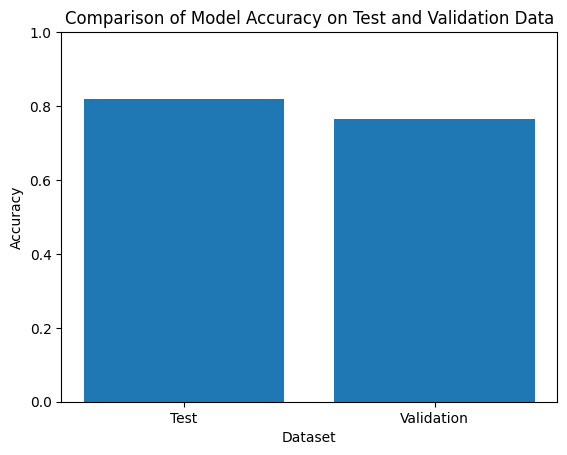

In [ ]:
labels = ['Test', 'Validation']
accuracy = [test_acc, valid_acc]

plt.bar(labels, accuracy)
# Create a bar chart using the 'labels' list as the x-axis labels and the 'accuracy' list as the corresponding y-axis values, representing the accuracy scores for the test and validation datasets.

#plt.plot(labels, accuracy, marker='o')
# An alternative approach to create a line plot with markers for data points. This line is commented out in the code.

plt.ylim([0, 1])
# Set the y-axis limits to be between 0 and 1.

plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracy on Test and Validation Data')
# Add labels and a title to the plot to provide context for the data being visualized.

plt.show()
# Display the generated plot.

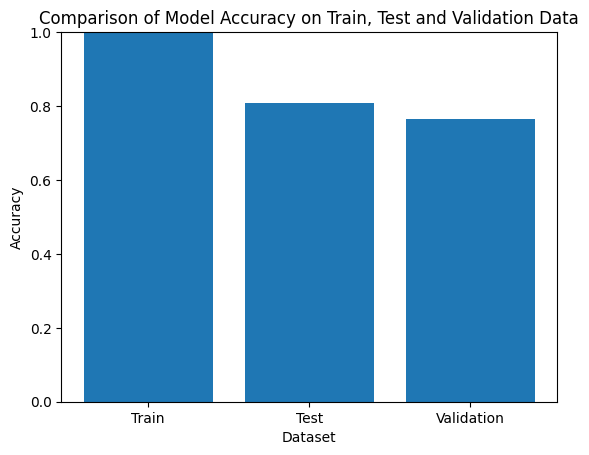

In [ ]:
# Visualization of the Accuracy of the Train (Random forest of 100% data), Test and Valid models
train_acc = 0.997447429196548
test_acc = 0.8093023255813954


labels = ['Train', 'Test', 'Validation']
accuracy = [train_acc ,test_acc, valid_acc]

plt.bar(labels, accuracy)
#plt.plot(labels, accuracy, marker='o')
plt.ylim([0,1])
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracy on Train, Test and Validation Data')
plt.show()

## Conclusion

The analysis compares the performance of two models, the Random Forest Classifier and the Decision Tree Classifier, in identifying offensive speech. It concludes that the Random Forest Classifier outperforms the Decision Tree Classifier in terms of accuracy and generalization ability. The report emphasizes the importance of developing robust models to ensure a better user experience and maintain a safe and healthy online environment.

Based on the findings, we recommend using the Random Forest Classifier for identifying offensive speech in a well-balanced dataset. We also recommend considering factors such as interpretability, computational efficiency, and generalization performance when selecting a model. Finally, we suggest increasing the amount of training data to improve the model's performance, but careful consideration should be given to balancing the training data size with the test data size to avoid overfitting.